In [1]:
import os, sys
import traceback
from Module.allo_chain import *
from Module.count import *
from Module.denoise import *
from Module.network import *
plt.style.use('classic')

In [2]:
def data_list(path):
    data_load = []
    for i in os.listdir(path):
        j = i.split('.')
        if 'txt' in j:
            data_load.append(i)
    return data_load

In [3]:
data_path = './data' #The path of 'data' folder

Text_path = data_path + '/Text/'                   #put your text here
#----------------------------------------------------------------------
Nsyl_path = data_path + '/N_syl/'                  #the output folder of N-syl distribution plot
Chain_path = data_path + '/Chain/'                 #the output folder of chain-rank plot
Allo_path = data_path + '/Allocation/'             #the output folder of allocation-rank plot
RRD_path = data_path + '/RRD/'                     #the output folder of RRD plot
FRD_path = data_path + '/FRD/'                     #the output folder of FRD plot
Geo_path = data_path + '/Geometric seq/'           #the output folder of geometric sequence plot
SC_path = data_path + '/SC/'                       #the output document of rg plot and SC value
fitting_path = data_path + '/fitting/'             #the output document of scaling lines fitting
network_path = data_path + '/network/'             #the output document of network analysis
#----------------------------------------------------------------------
Big_path = data_path + '/Statistical result/'      #the output folder of all statistical data in execl


data_load = data_list(Text_path)
Text_load = [Text_path + i for i in data_load]
for i in data_load:
    print(i)

News.txt


In [4]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)

def main():
    error_list = []
    #-------------------check if folders exist-----------------------------
    PATH = [Nsyl_path, Chain_path, Allo_path, RRD_path, FRD_path, Geo_path, SC_path,
            fitting_path, network_path, Big_path]
    for P in PATH:
        try:           
            os.makedirs(P)  #create the folder
        except:
            print('***The folder "%s" already exist.' % P)
    #----------------------------------------------------------------------
    for Q in range(len(data_load)):
        try:
            filename = data_load[Q]
            name = filename.split('.')[0]
            big, syl, word, longest = info(Text_load[Q], encode)
            count_allo(word, syl)
            print('Successfully count allocation and chain!' + '(%s)' % filename)
            write_to_excel(big, word, syl, Big_path + name)
            #--------------plot N-syl plot
            FORMAT = 'png' #the format of your picture
            Path = Nsyl_path
            N_syl_dist(name, big, longest, FORMAT, Path)
            
            #--------------plot geometric_sequence
            V, H = geometric_sequence(word, syl)
            max_range = 50 #the number of elements in the sequence you want to know
            x = 'H'
            FORMAT = 'png' #the format of your picture
            shift = 'N' #If you don't want to measure shift, just assign shift != 'T'.
            Path = Geo_path
            
            RH = which_plot(name, V, H, x, max_range, shift, FORMAT, Path)
            #--------------plot FRD plot
            FORMAT = 'png' #the format of your picture
            #auto positioning when (x_pos, y_pos)=(0, 0)
            x_pos = 0
            y_pos = 0
            Path = FRD_path

            Zipf = FRD_plot(name, word, syl, x_pos, y_pos, FORMAT, Path)
            #--------------plot RRD plot
            need_line = 'Y'
            number_of_lines = 4
            Color = '#ff0000'
            FORMAT = 'png' #the format of your picture
            Path = RRD_path

            coordinate = draw_RRD_plot(big, word, syl, longest, name, V, H,
                           need_line, number_of_lines, Color, FORMAT, Path)
            #--------------plot allocation-rank plot
            FORMAT = 'png' #the format of your picture
            x_pos = 0 #auto positioning = 0; otherwise change the value you want
            y_pos = 0 #auto positioning = 0; otherwise change the value you want
            Path = Allo_path

            Allo_plot(name, syl, x_pos, y_pos, FORMAT, Path)
            #--------------plot chain-rank plot
            FORMAT = 'png' #the format of your picture
            x_pos = 0 #auto positioning = 0; otherwise change the value you want
            y_pos = 0 #auto positioning = 0; otherwise change the value you want
            Path = Chain_path

            Chain_plot(name, word, x_pos, y_pos, FORMAT, Path)
            #--------------Network analysis
            graph_word, graph_syl = build_edge(coordinate)
            G_word, cluster_word, word_degree_sequence = graph_word[0], graph_word[1], graph_word[2]
            G_syl, cluster_syl, syl_degree_sequence = graph_syl[0], graph_syl[1], graph_syl[2]            
            FORMAT = 'pdf'
            Path = network_path
            
            plot_degree_word(name, word_degree_sequence, FORMAT, Path)
            plot_degree_syl(name, syl_degree_sequence, FORMAT, Path)
            #--------------calculate SC and fitting scaling lines
            FORMAT = 'png' #the format of your picture
            
            g, glu = plot_g(4, V, H, big, name, longest, toler = 50, avg_N = 50)
            Rg = rg(name, g, FORMAT, SC_path)
            fit_para = fit_with_cut(glu, Rg[0], V, H, Zipf, name, FORMAT, fitting_path)
            print('Successfully run all!' + '(%s)' % filename)
        #--------------add filename to error_list when error      
        except Exception as exc:
            traceback.print_exc()
            error_list.append(data_load[Q])
            print('')
    if error_list != []:
        print('The following file get error when running:')
        for i in error_list:
            print(i)

read file successfully!
Successfully count word freqency!(./data/Text/News.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(News.txt)


/Users/lab/Downloads/Scaling-linguistics/scaling analysis/Chinese/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-linguistics/scaling analysis/Chinese/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


the (8, 5) block have no points.


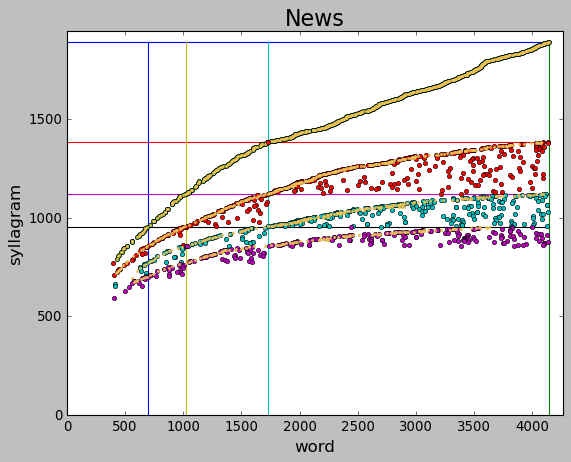

fitting range = [1035, 4142]
Successfully run all!(News.txt)


In [5]:
main()